In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('./imdbtop100.csv')
df.head()

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...


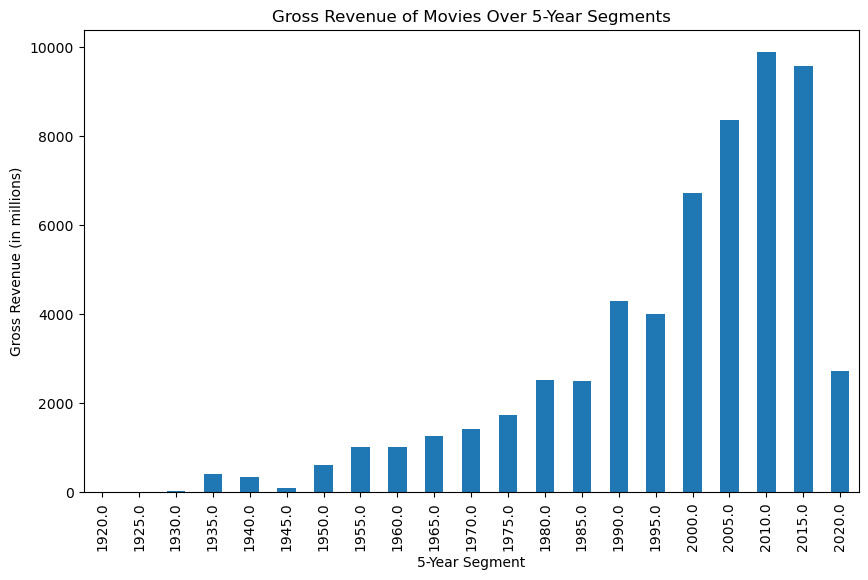

In [3]:
# Convert 'Year of Release' to numeric
df['Year of Release'] = pd.to_numeric(df['Year of Release'], errors='coerce')

# Drop rows with NaN values in 'Year of Release'
df = df.dropna(subset=['Year of Release'])

# Convert 'Gross' column to numeric
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Create a new column for 5-year segments
df['Year Segment'] = (df['Year of Release'] // 5) * 5

# Group by 'Year Segment' and sum the 'Gross' revenue
gross_by_segment = df.groupby('Year Segment')['Gross'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
gross_by_segment.plot(kind='bar')
plt.title('Gross Revenue of Movies Over 5-Year Segments')
plt.xlabel('5-Year Segment')
plt.ylabel('Gross Revenue (in millions)')
plt.show()

In [4]:
# Summary statistics for gross revenue before 1993
num_movies_before_1993 = df[df['Year of Release'] < 1993].shape[0]
gross_before_1993 = df[df['Year of Release'] < 1993]['Gross'].sum()
mean_gross_before_1993 = df[df['Year of Release'] < 1993]['Gross'].mean()
median_gross_before_1993 = df[df['Year of Release'] < 1993]['Gross'].median()
std_gross_before_1993 = df[df['Year of Release'] < 1993]['Gross'].std()
iqr_gross_before_1993 = df[df['Year of Release'] < 1993]['Gross'].quantile(0.75) - df[df['Year of Release'] < 1993]['Gross'].quantile(0.25)
var_gross_before_1993 = df[df['Year of Release'] < 1993]['Gross'].var()

# Summary statistics for gross revenue after 1993
num_movies_after_1993 = df[df['Year of Release'] >= 1993].shape[0]
gross_after_1993 = df[df['Year of Release'] >= 1993]['Gross'].sum()
mean_gross_after_1993 = df[df['Year of Release'] >= 1993]['Gross'].mean()
median_gross_after_1993 = df[df['Year of Release'] >= 1993]['Gross'].median()
std_gross_after_1993 = df[df['Year of Release'] >= 1993]['Gross'].std()
iqr_gross_after_1993 = df[df['Year of Release'] >= 1993]['Gross'].quantile(0.75) - df[df['Year of Release'] >= 1993]['Gross'].quantile(0.25)
var_gross_after_1993 = df[df['Year of Release'] >= 1993]['Gross'].var()

print(f"Number of movies before 1993: {num_movies_before_1993}")
print(f"Total gross revenue before 1993: {gross_before_1993}")
print(f"Mean gross revenue before 1993: {mean_gross_before_1993}")
print(f"Median gross revenue before 1993: {median_gross_before_1993}")
print(f"Standard deviation of gross revenue before 1993: {std_gross_before_1993}")
print(f"IQR of gross revenue before 1993: {iqr_gross_before_1993}")
print(f"Variance of gross revenue before 1993: {var_gross_before_1993}")
print()
print(f"Number of movies after 1993: {num_movies_after_1993}")
print(f"Total gross revenue after 1993: {gross_after_1993}")
print(f"Mean gross revenue after 1993: {mean_gross_after_1993}")
print(f"Median gross revenue after 1993: {median_gross_after_1993}")
print(f"Standard deviation of gross revenue after 1993: {std_gross_after_1993}")
print(f"IQR of gross revenue after 1993: {iqr_gross_after_1993}")
print(f"Variance of gross revenue after 1993: {var_gross_after_1993}")

Number of movies before 1993: 392
Total gross revenue before 1993: 15123.57
Mean gross revenue before 1993: 49.26244299674267
Median gross revenue before 1993: 20.05
Standard deviation of gross revenue before 1993: 69.83653826394892
IQR of gross revenue before 1993: 58.155
Variance of gross revenue before 1993: 4877.142076692002

Number of movies after 1993: 573
Total gross revenue after 1993: 43381.240000000005
Mean gross revenue after 1993: 86.76248000000001
Median gross revenue after 1993: 28.985
Standard deviation of gross revenue after 1993: 134.51343003570136
IQR of gross revenue after 1993: 118.18499999999999
Variance of gross revenue after 1993: 18093.862859969526


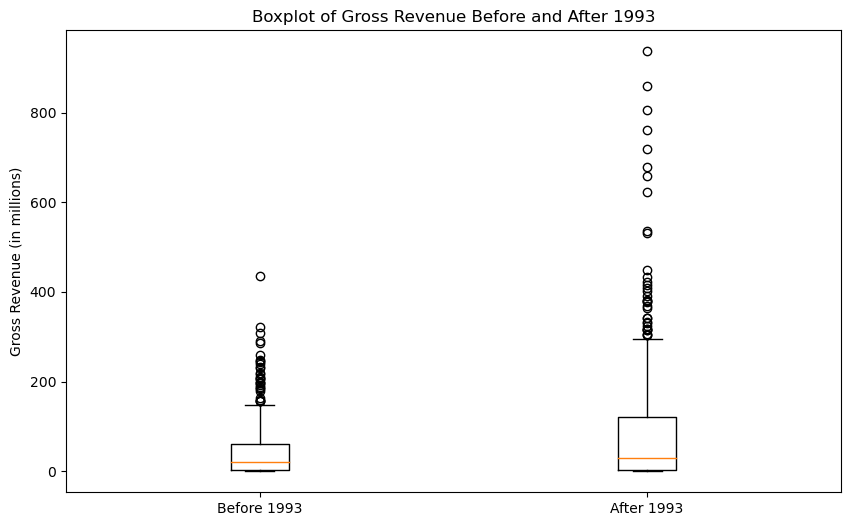

In [5]:
# boxplot of gross revenue before and after 1993
plt.figure(figsize=(10, 6))
data = [df[df['Year of Release'] < 1993]['Gross'].dropna(), df[df['Year of Release'] >= 1993]['Gross'].dropna()]
plt.boxplot(data, labels=['Before 1993', 'After 1993'])
plt.title('Boxplot of Gross Revenue Before and After 1993')
plt.ylabel('Gross Revenue (in millions)')
plt.show()

T-statistic: -5.196614107393127
P-value: 0.0000002589
because the p-value is less than 0.05, we reject the null hypothesis


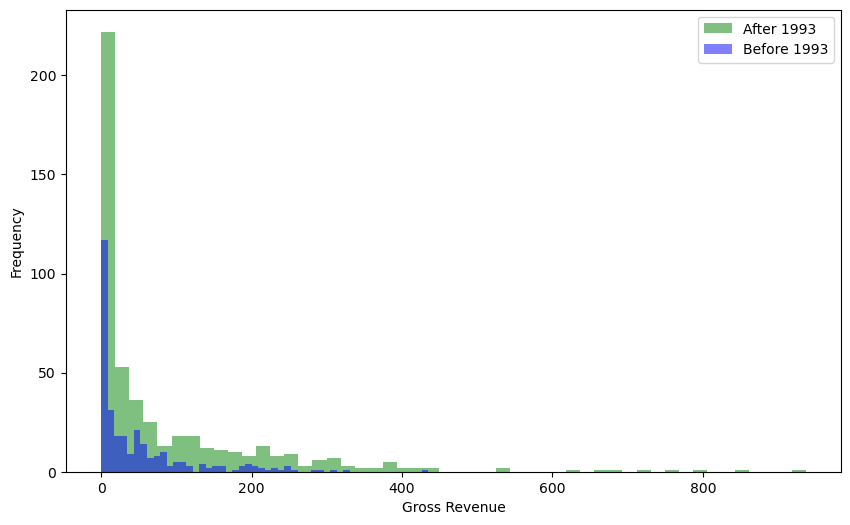

In [6]:
# conducting two sample t test
data_before_1993 = df[df['Year of Release'] < 1993]['Gross'].dropna()
data_after_1993 = df[df['Year of Release'] >= 1993]['Gross'].dropna()

t_stat, p_value = stats.ttest_ind(data_before_1993, data_after_1993, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value:.10f}")
print("because the p-value is less than 0.05, we reject the null hypothesis")

# plotting the data with different colors
plt.figure(figsize=(10, 6))
plt.hist(data_after_1993, bins=50, alpha=0.5, label='After 1993', color='green')
plt.hist(data_before_1993, bins=50, alpha=0.5, label='Before 1993', color='blue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()
